Question 1. 

A classification decision tree is a tool that classifies data points in a tree-like structure. It addresses problems where the goal is to categorize data points into different "classes" based on input. An example of a real-world application is disease diagnosis. Compared to multiple linear regression that predicts a continuous numerical value, decision trees predict a cateogrical label. They start at the root node and uses thresholds to follow branches until it ends at the it's final class, while multiple linear regression uses a formula to predict. 

Question 2. 

Accuracy: A factory using sensors to classify a product as defective or non-defective. If the proportion of defectives is 5% and non-defective is 95%, and the cost of misclassifcation is similar for both, then false positive will result in slight losses and false negative will harm reputation but it is not too harmful overall. 

Sensitivity: In diagnosing diseases, sensitivity matters because a false negative could delay treatment and even result in death. High sensitivity that produces more false positives would be better in this case. 

Specificity: Criminal justice and forensic analysis needs specificity because it will ensure that true negatives are not falsely identified as suspects (false positives). It is applicable where avoiding false positives is crucial. 

Precision: It's useful where false positives have significant concequences, such as autonomous vehicles. False positives in this case can negatively impact driving and safety, which can be avoided with higher precision. 

Question 3. 


In [16]:
import pandas as pd
import numpy as np
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, recall_score, make_scorer
import graphviz as gv

url = "https://raw.githubusercontent.com/pointOfive/STA130_F23/main/Data/amazonbooks.csv"
ab = pd.read_csv(url, encoding="ISO-8859-1")
# create `ab_reduced_noNaN` based on the specs above

# Drop the specified columns
ab_reduced = ab.drop(columns=['Weight_oz', 'Width', 'Height'])

# Drop rows with NaN entries
ab_reduced_noNaN = ab_reduced.dropna()

# Convert data types using .loc to avoid the warning
ab_reduced_noNaN.loc[:, 'Pub year'] = ab_reduced_noNaN['Pub year'].astype(int)
ab_reduced_noNaN.loc[:, 'NumPages'] = ab_reduced_noNaN['NumPages'].astype(int)
ab_reduced_noNaN.loc[:, 'Hard_or_Paper'] = ab_reduced_noNaN['Hard_or_Paper'].astype('category')

# Display the resulting DataFrame
ab_reduced_noNaN.head()

,Title,Author,List Price,Amazon Price,Hard_or_Paper,NumPages,Publisher,Pub year,ISBN-10,Thick
0,"1,001 Facts that Will Scare the S#*t Out of Yo...",Cary McNeal,12.95,5.18,P,304.0,Adams Media,2010.0,1605506249,0.8
1,21: Bringing Down the House - Movie Tie-In: Th...,Ben Mezrich,15.00,10.20,P,273.0,Free Press,2008.0,1416564195,0.7
2,100 Best-Loved Poems (Dover Thrift Editions),Smith,1.50,1.50,P,96.0,Dover Publications,1995.0,486285537,0.3
3,1421: The Year China Discovered America,Gavin Menzies,15.99,10.87,P,672.0,Harper Perennial,2008.0,61564893,1.6
4,1493: Uncovering the New World Columbus Created,Charles C. Mann,30.50,16.77,P,720.0,Knopf,2011.0,307265722,1.4


Question 4. 

In [17]:
# Shuffle the DataFrame using df.sample
ab_reduced_noNaN_shuffled = ab_reduced_noNaN.sample(frac=1, random_state=42)

# Calculate the split index (80% for training, 20% for testing)
train_size = int(0.8 * len(ab_reduced_noNaN_shuffled))

# Create training and testing sets
ab_reduced_noNaN_train = ab_reduced_noNaN_shuffled[:train_size]
ab_reduced_noNaN_test = ab_reduced_noNaN_shuffled[train_size:]

# Display the sizes of the resulting DataFrames
print(f"Training set size: {len(ab_reduced_noNaN_train)}")
print(f"Testing set size: {len(ab_reduced_noNaN_test)}")

Training set size: 255
Testing set size: 64


There are 255 observations in the training data set and 64 in the test data set.

In [18]:
from sklearn.tree import DecisionTreeClassifier

# Define the feature (List Price) and target (Hard_or_Paper)
X = ab_reduced_noNaN[['List Price']]  # Feature
y = pd.get_dummies(ab_reduced_noNaN["Hard_or_Paper"])['H']  # Target (Hard cover = 1, Paper back = 0)

# Initialize the DecisionTreeClassifier with max_depth=2
clf = DecisionTreeClassifier(max_depth=2, random_state=42)

# Train the classifier
clf.fit(X, y)

# Optionally, print the model to check the structure
print(clf)

DecisionTreeClassifier(max_depth=2, random_state=42)


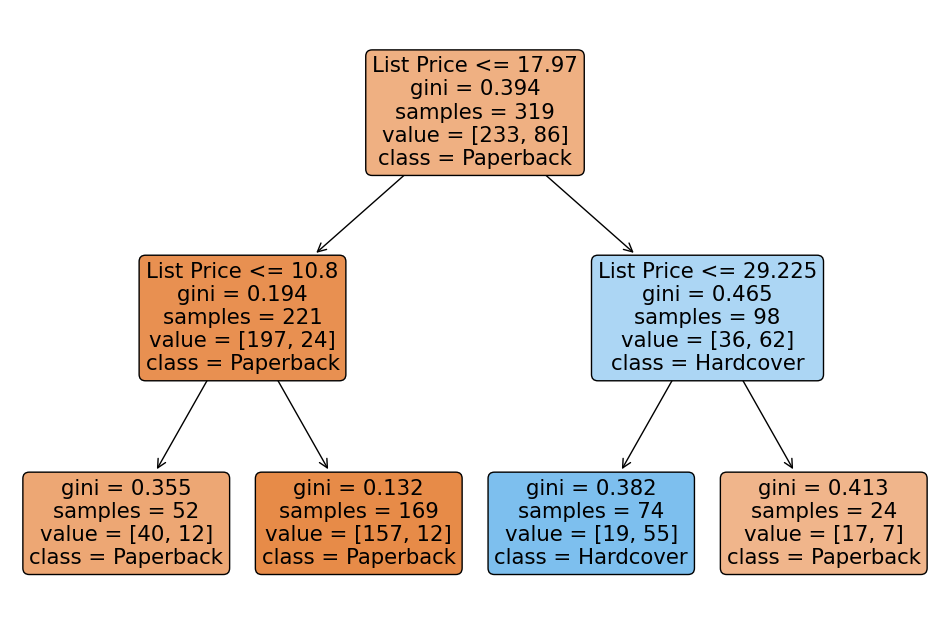

In [19]:
import matplotlib.pyplot as plt
from sklearn import tree

# Plot the decision tree
plt.figure(figsize=(12,8))
tree.plot_tree(clf, filled=True, feature_names=['List Price'], class_names=['Paperback', 'Hardcover'], rounded=True)
plt.show()


For the fitted clf model, predictions are made based on List Price by using a threshold on the List Price to divide the data. Since the maximum depth is 2, there is only 2 levels of decision making. In this example, if the price is <= 17.97, then the book is predicted to be a paperback, and if it's >17.97, and also <= 29.225, then it's hardcover, but if it's >17.97 but also >29.229, then it's a paperback. 

Question 5. 

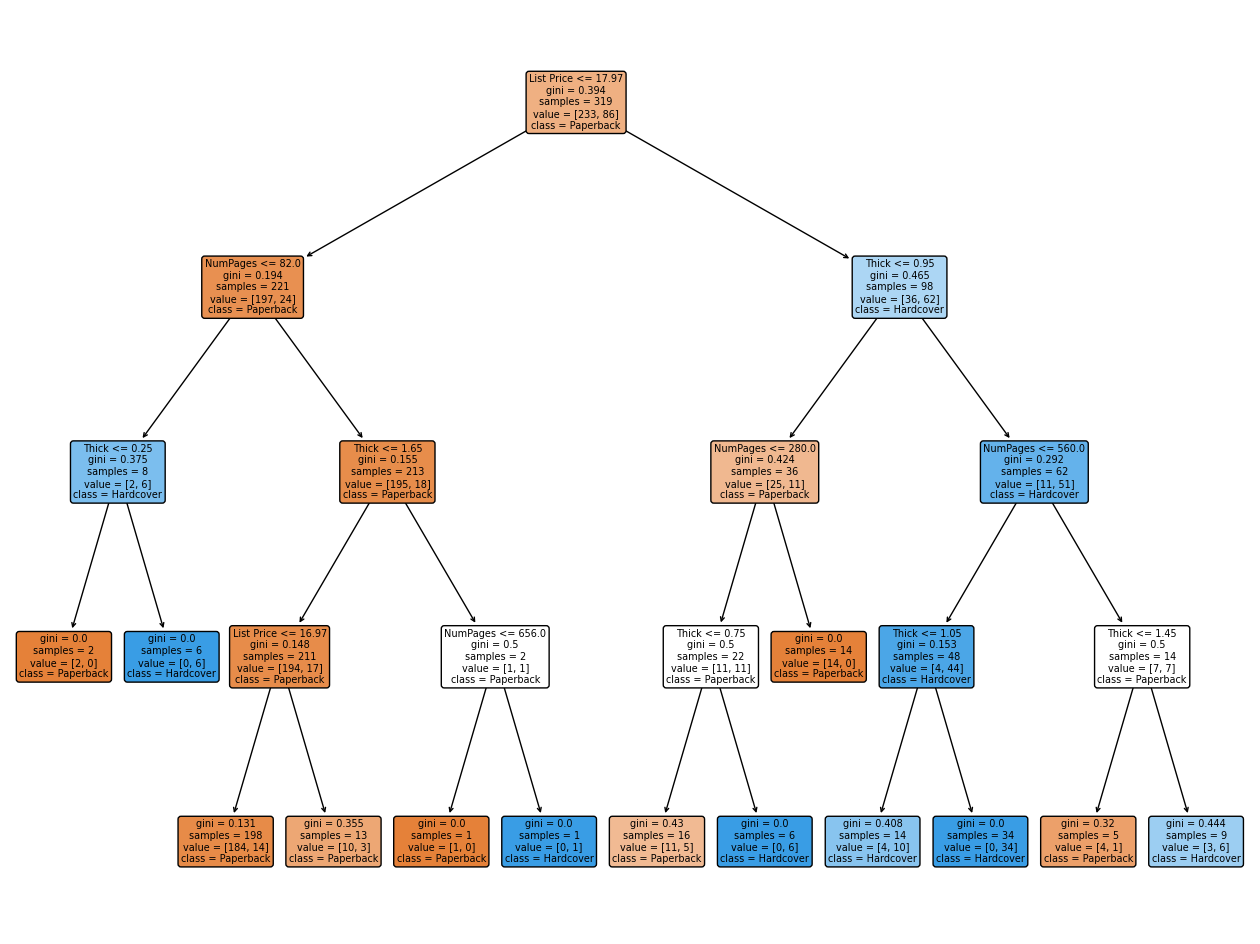

In [20]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Define the features (X) and target (y) for clf2
X_clf2 = ab_reduced_noNaN[['NumPages', 'Thick', 'List Price']]
y_clf2 = pd.get_dummies(ab_reduced_noNaN["Hard_or_Paper"])['H']

# Initialize the DecisionTreeClassifier with max_depth=4
clf2 = DecisionTreeClassifier(max_depth=4, random_state=42)

# Train the model
clf2.fit(X_clf2, y_clf2)

# Visualize the decision tree
plt.figure(figsize=(16, 12))
plot_tree(clf2, filled=True, feature_names=['NumPages', 'Thick', 'List Price'], class_names=['Paperback', 'Hardcover'], rounded=True)
plt.show()

clf2 makes predictions starting from the root node and making it's way down the different decisions .

Question 6. 

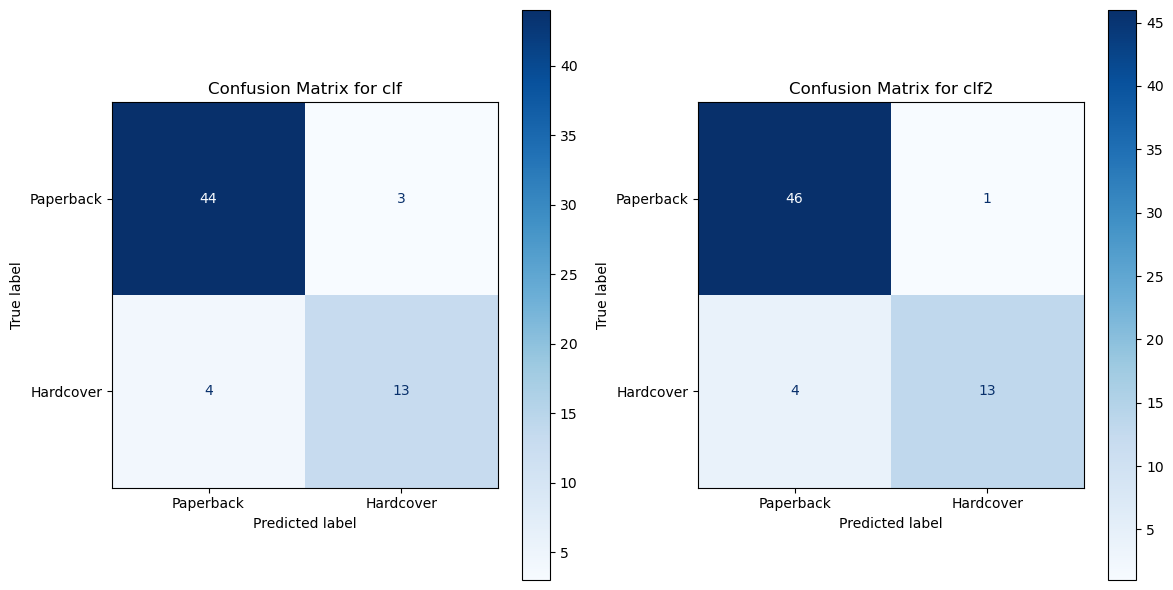

In [26]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Step 1: Prepare the test data
X_test = ab_reduced_noNaN_test[['NumPages', 'Thick', 'List Price']]
y_test = pd.get_dummies(ab_reduced_noNaN_test["Hard_or_Paper"], drop_first=False)['H']

# Step 2: Make predictions for clf and clf2
y_pred_clf = clf.predict(ab_reduced_noNaN_test[['List Price']])  # Match features used in clf
y_pred_clf2 = clf2.predict(X_test)  # Match features used in clf2

# Step 3: Generate confusion matrices
cm_clf = confusion_matrix(y_test, y_pred_clf)
cm_clf2 = confusion_matrix(y_test, y_pred_clf2)

# Step 4: Visualize confusion matrices
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Confusion Matrix for clf
disp_clf = ConfusionMatrixDisplay(confusion_matrix=cm_clf, display_labels=['Paperback', 'Hardcover'])
disp_clf.plot(ax=axes[0], cmap='Blues')
axes[0].set_title("Confusion Matrix for clf")

# Confusion Matrix for clf2
disp_clf2 = ConfusionMatrixDisplay(confusion_matrix=cm_clf2, display_labels=['Paperback', 'Hardcover'])
disp_clf2.plot(ax=axes[1], cmap='Blues')
axes[1].set_title("Confusion Matrix for clf2")

# Display the confusion matrices
plt.tight_layout()
plt.show()

In [38]:
from sklearn.metrics import accuracy_score, confusion_matrix

# Step 1: Calculate the confusion matrices for both models
cm_clf = confusion_matrix(y_test, y_pred_clf)
cm_clf2 = confusion_matrix(y_test, y_pred_clf2)

# Extract values from the confusion matrix for clf
TP_clf, FP_clf, FN_clf, TN_clf = cm_clf.ravel()

# Extract values from the confusion matrix for clf2
TP_clf2, FP_clf2, FN_clf2, TN_clf2 = cm_clf2.ravel()

# Step 2: Calculate Sensitivity, Specificity, and Accuracy for clf
sensitivity_clf = TP_clf / (TP_clf + FN_clf)
specificity_clf = TN_clf / (TN_clf + FP_clf)
accuracy_clf = (TP_clf + TN_clf) / (TP_clf + FP_clf + FN_clf + TN_clf)

# Step 3: Calculate Sensitivity, Specificity, and Accuracy for clf2
sensitivity_clf2 = TP_clf2 / (TP_clf2 + FN_clf2)
specificity_clf2 = TN_clf2 / (TN_clf2 + FP_clf2)
accuracy_clf2 = (TP_clf2 + TN_clf2) / (TP_clf2 + FP_clf2 + FN_clf2 + TN_clf2)

# Step 4: Print the results
print("Metrics for clf (List Price only):")
print(f"Sensitivity: {sensitivity_clf:.2f}")
print(f"Specificity: {specificity_clf:.2f}")
print(f"Accuracy: {accuracy_clf:.2f}")

print("\nMetrics for clf2 (NumPages, Thick, List Price):")
print(f"Sensitivity: {sensitivity_clf2:.2f}")
print(f"Specificity: {specificity_clf2:.2f}")
print(f"Accuracy: {accuracy_clf2:.2f}")


Metrics for clf (List Price only):
Sensitivity: 0.92
Specificity: 0.81
Accuracy: 0.89

Metrics for clf2 (NumPages, Thick, List Price):
Sensitivity: 0.92
Specificity: 0.93
Accuracy: 0.92


Question 7.

The differences between the two confusion matricies is that the one below is generated using training data, which evaluates how well the models (trained on this same data) classify the training data, while the one above is generated using testing data, which evaluates how well the models generalize to unseen data. The second approach is better because it evaluates model performance on a separate test dataset. This ensures that the results reflect the model's ability to generalize to new data, which is the ultimate goal in machine learning. 

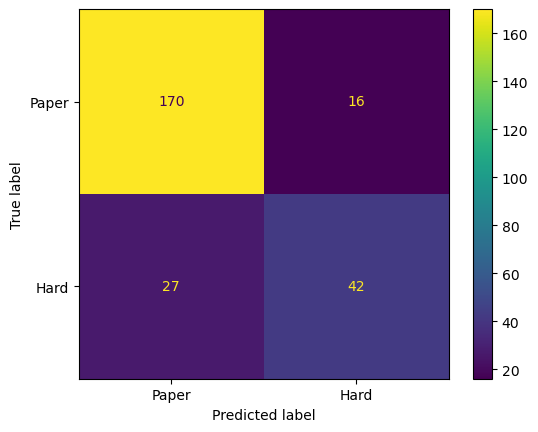

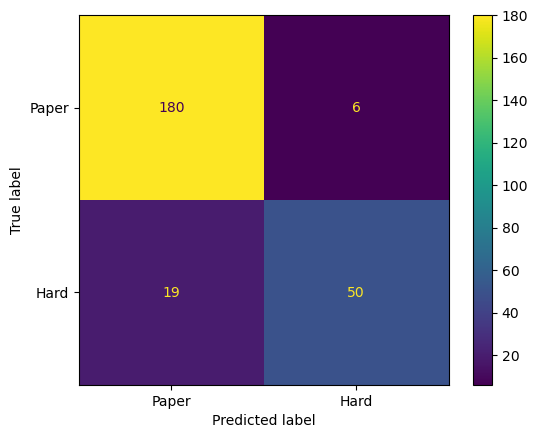

In [35]:
ConfusionMatrixDisplay(confusion_matrix(ab_reduced_noNaN_train["Hard_or_Paper"]=='H', clf.predict(ab_reduced_noNaN_train[['List Price']]), labels=[0, 1]), display_labels=["Paper","Hard"]).plot()
ConfusionMatrixDisplay(confusion_matrix(ab_reduced_noNaN_train["Hard_or_Paper"]=='H', clf2.predict(ab_reduced_noNaN_train[['NumPages','Thick','List Price']]), labels=[0, 1]), display_labels=["Paper","Hard"]).plot()

Question 8.


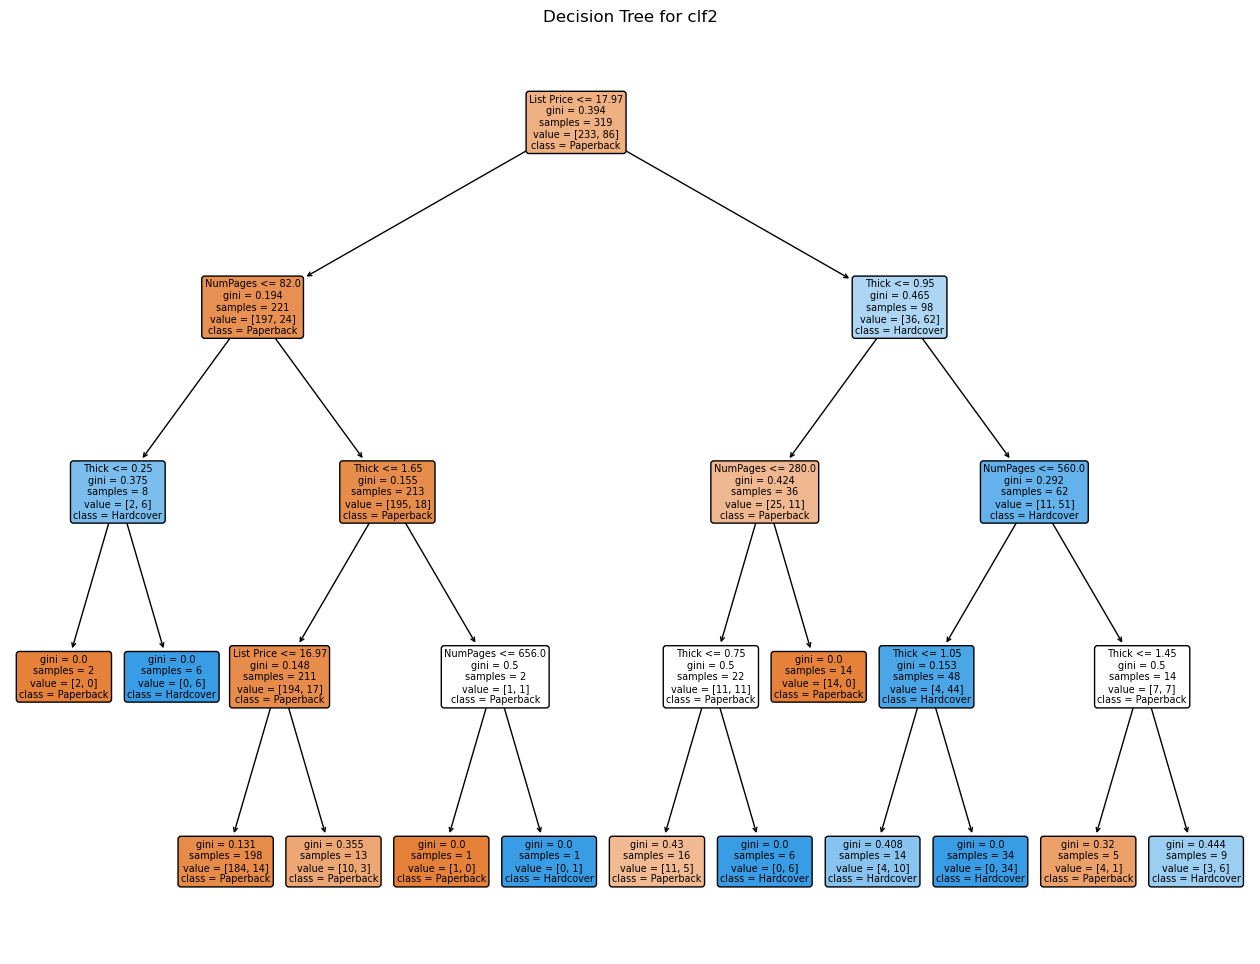

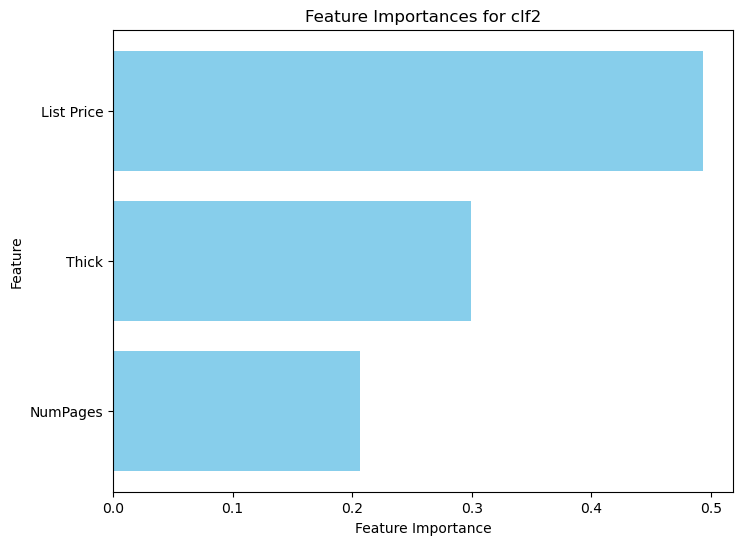

The most important predictor variable is 'List Price' with an importance score of 0.494.


In [37]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Define the features (X) and target (y)
X_clf2 = ab_reduced_noNaN[['NumPages', 'Thick', 'List Price']]
y_clf2 = pd.get_dummies(ab_reduced_noNaN["Hard_or_Paper"])['H']

# Step 2: Train clf2
clf2 = DecisionTreeClassifier(max_depth=4, random_state=42)
clf2.fit(X_clf2, y_clf2)

# Step 3: Visualize the decision tree
plt.figure(figsize=(16, 12))
plot_tree(
    clf2,
    filled=True,
    feature_names=clf2.feature_names_in_,
    class_names=['Paperback', 'Hardcover'],
    rounded=True
)
plt.title("Decision Tree for clf2")
plt.show()

# Step 4: Extract feature importances
feature_names = clf2.feature_names_in_
feature_importances = clf2.feature_importances_

# Step 5: Sort features by importance
sorted_idx = np.argsort(feature_importances)[::-1]
sorted_features = feature_names[sorted_idx]
sorted_importances = feature_importances[sorted_idx]

# Step 6: Plot feature importances
plt.figure(figsize=(8, 6))
plt.barh(sorted_features, sorted_importances, color='skyblue')
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.title("Feature Importances for clf2")
plt.gca().invert_yaxis()  # Show the most important at the top
plt.show()

# Step 7: Report the most important predictor variable
most_important_feature = sorted_features[0]
most_important_importance = sorted_importances[0]
print(f"The most important predictor variable is '{most_important_feature}' with an importance score of {most_important_importance:.3f}.")


Question 9. 
Coefficients in linear regression assess the direction and magnitude of the relationship between each predictor and target variable, assuming all the other predictors are constant. They indicate how much the target is expected to change for a one-unit change in the predictor. Feature importances in decision trees reflect how much each feature contributes to reducing error across splits. They show importance rather than direct effcts, and they take into account interactions and non-linear relationships. 

Question 10.
Mostly

Chatgpt link: https://chatgpt.com/share/673d12c9-c520-8007-beba-8820d4db7904 and summary: We discussed how to train, evaluate, and visualize decision tree classifiers in scikit-learn, focusing on interpreting confusion matrices, feature importances, and tree structures. We also examined how to use features like "List Price" and "NumPages" to predict book attributes like "Paperback" vs "Hardcover." Finally, we contrasted the interpretation of coefficients in linear regression with feature importances in decision trees.